<!-- ABSTRACT -->

This notebook can be used to plot learning curves for a given run, including losses, r2, learning rate schedule, and correlation coefficients.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
run_name = 'wannabe_best_6'

# Read the CSV files (from WandB)
df_val_loss = pd.read_csv('val_loss.csv')
df_train_loss = pd.read_csv('train_loss.csv')
df_r2 = pd.read_csv('r2.csv')
df_lr = pd.read_csv('lr.csv')
df_spearman = pd.read_csv('spearman.csv')
df_pearson = pd.read_csv('pearson.csv')

epoch_steps = range(750)

### Style 1: Side by Side

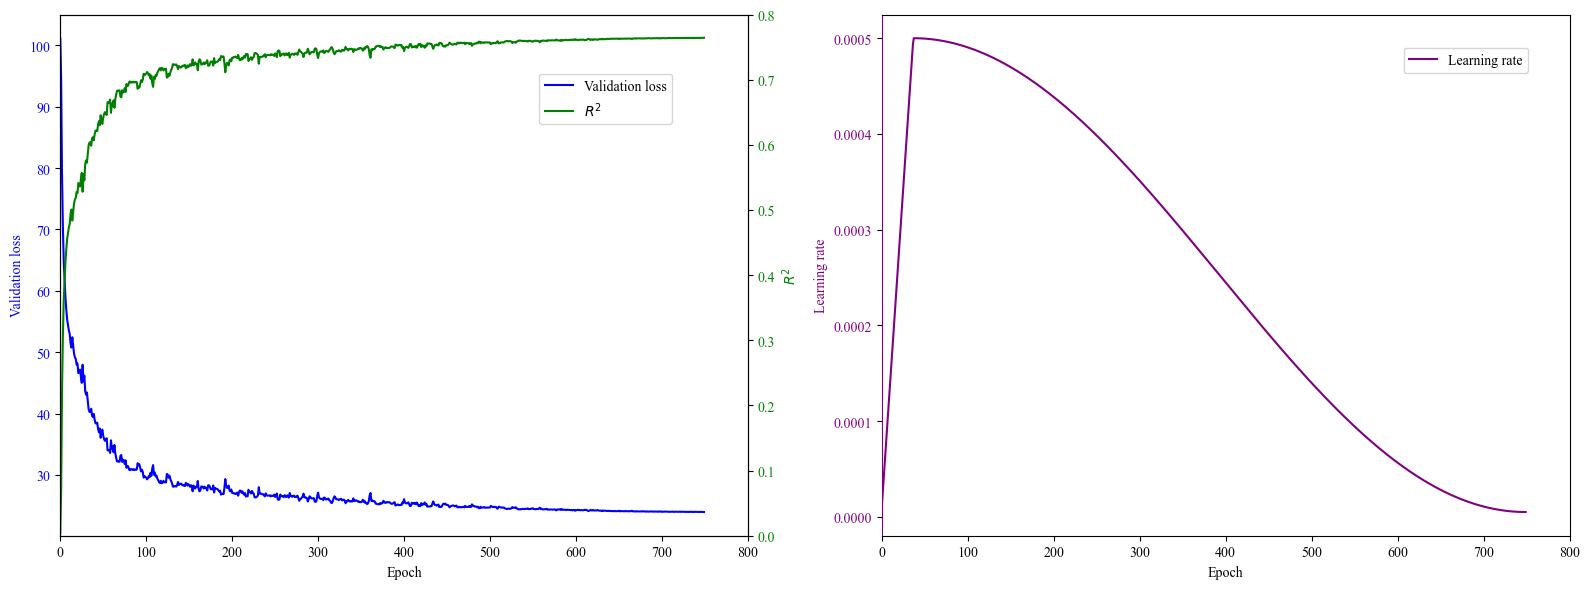

In [4]:
# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Plot for Validation Loss and R^2 on the left
line1 = ax1.plot(epoch_steps, df_val_loss[run_name + ' - val_loss'], label='Validation loss', color='b')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation loss', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for R^2
ax1_twin = ax1.twinx()
line2 = ax1_twin.plot(epoch_steps, df_r2[run_name + ' - r^2'], label=r"$R^2$", color='g')
ax1_twin.set_ylabel(r"$R^2$", color='g')
ax1_twin.set_ylim(0, 0.8)  # Set y-axis limits for R squared
ax1_twin.tick_params(axis='y', labelcolor='g')

# Combine handles and labels for a single legend
lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right', bbox_to_anchor=(0.9, 0.9))

# Set x-axis limits
ax1.set_xlim(0, 800)

# Plot for Learning Rate on the right
ax2.plot(epoch_steps, df_lr[run_name + ' - lr'], label='Learning rate', color='purple')
ax2.set_xlim(0, 800)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Learning rate', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.spines['left'].set_color('purple')  # Change the color of the y-axis spine

# Add legend to the right plot
ax2.legend(loc='upper right', bbox_to_anchor=(0.95, 0.95))

# Save the figure
plt.tight_layout()  # Adjust the layout
plt.savefig('combined_plot.png', dpi=500, bbox_inches='tight')  # Save as a high-resolution image

# Show the plot
plt.show()

### Style 2: Separate, with Spearman and Pearson Correlation Coefficients

In [ ]:
# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the loss with x-axis starting from 0
ax1.plot(epoch_steps, df_train_loss[run_name + ' - train_loss'], label='Training loss', color='r')
ax1.plot(epoch_steps, df_val_loss[run_name + ' - val_loss'], label='Validation loss', color='b')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation loss', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(epoch_steps, df_r2[run_name + ' - r^2'], label=r"$R^2$", color='g')
ax2.set_ylabel(r"$R^2$", color='g')
ax2.set_ylim(0, 0.8)  # Set y-axis limits for R squared
ax2.tick_params(axis='y', labelcolor='g')

plt.xlim(left=0)
plt.xlim(right=800)
# plt.ylim(bottom=0)

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(0.8, 0.8))

# Save the figure
plt.savefig('loss_plot.png', dpi=500, bbox_inches='tight')  # Save as a high-resolution image

# Show the plot
plt.show()

In [ ]:
# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the loss with x-axis starting from 0
ax1.plot(epoch_steps, df_pearson['wannabe_best_6 - pearson'], label='Pearson', color='firebrick')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Pearson', color='firebrick')
ax1.set_ylim(0, 0.9)  # Moved Pearson limits to primary axis
ax1.tick_params(axis='y', labelcolor='firebrick')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(epoch_steps, df_spearman['wannabe_best_6 - spearman'], label='Spearman', color='mediumslateblue')
ax2.set_ylabel('Spearman', color='mediumslateblue')
ax2.set_ylim(0, 0.5)  # Moved Spearman limits to secondary axis
ax2.tick_params(axis='y', labelcolor='mediumslateblue')


plt.xlim(left=0)
plt.xlim(right=800)

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.8))

# Save the figure
plt.savefig('pearson_spearman.png', dpi=500, bbox_inches='tight')  # Save as a high-resolution image

# Show the plot
plt.show()